In [26]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_pickle('data/test_data.pkl')
df = df.loc[(df["Branch"] == "15") & (df["Group"].isin(["6","7","4","1"]))]

In [17]:
df

sales  DayInYear  time_idx Wahl Baustelle MontagLangesWE  \
270300  1600.9030        177      2369  0.0       0.0            0.0   
270301  1811.1958        178      2370  0.0       0.0            0.0   
270302  1784.2916        179      2371  0.0       0.0            0.0   
270303  1757.3488        180      2372  0.0       0.0            0.0   
270304  1741.0982        181      2373  0.0       0.0            0.0   
...           ...        ...       ...  ...       ...            ...   
287065  1643.1700        173      2730  0.0       0.0            0.0   
287066  1597.3518        174      2731  0.0       0.0            0.0   
287067  1683.6228        175      2732  0.0       0.0            0.0   
287068  1785.2180        176      2733  0.0       0.0            0.0   
287069  1589.9020        177      2734  0.0       0.0            0.0   

       FreitagLangesWE nosale holiday AufSommerzeit  ... Branch Weekday  \
270300             0.0      0    none           0.0  ...     15       6   
270301             0.0      0    none           0.0  ...     15       0   
270302             0.0      0    none           0.0  ...     15       1   
270303             0.0      0    none           0.0  ...     15       2   
270304             0.0      0    none           0.0  ...     15       3   
...                ...    ...     ...           ...  ...    ...     ...   
287065             0.0      0    none           0.0  ...     15       3   
287066             0.0      0    none           0.0  ...     15       4   
287067             0.0      0    none           0.0  ...     15       5   
287068             0.0      0    none           0.0  ...     15       6   
287069             0.0      0    none           0.0  ...     15       0   

             Date MTXWTH_Day_precip MTXWTH_Temp_max  MTXWTH_Temp_min  Start  \
270300 2022-06-26               0.0           28.52            17.47    7.0   
270301 2022-06-27               0.0           25.75            16.70    6.0   
270302 2022-06-28               0.0           23.57            14.17    6.0   
270303 2022-06-29               0.0           26.81            13.09    6.0   
270304 2022-06-30               0.0           27.26            15.00    6.0   
...           ...               ...             ...              ...    ...   
287065 2023-06-22               0.0           26.93            13.06    6.0   
287066 2023-06-23               1.0           23.99            15.98    6.0   
287067 2023-06-24               0.0           25.99            12.04    6.0   
287068 2023-06-25               0.0           28.99            15.02    7.0   
287069 2023-06-26               0.0           27.96            17.01    6.0   

              End  ShiftLength  weight  
270300  10.983333        240.0       1  
270301  13.983333        480.0       1  
270302  13.983333        480.0       1  
270303  13.983333        480.0       1  
270304  13.983333        480.0       1  
...           ...          ...     ...  
287065  16.983333        660.0       1  
287066  16.983333        660.0       1  
287067  15.983333        600.0       1  
287068  15.983333        540.0       1  
287069  16.983333        660.0       1  

[1464 rows x 22 columns]

In [18]:
df.loc[df['Group'] == '1', "sales"]

270300    1600.9030
270301    1811.1958
270302    1784.2916
270303    1757.3488
270304    1741.0982
            ...    
270661    1885.6552
270662    1974.7440
270663    1738.3962
270664    1741.8702
270665    1973.2386
Name: sales, Length: 366, dtype: float64

In [19]:
df.loc[df['Group'] == '4', "sales"]

278502    1585.0384
278503       0.0000
278504       0.0000
278505    1582.0276
278506    1521.5414
            ...    
278863    1672.7762
278864    1598.2010
278865    1683.6228
278866    1660.6944
278867       0.0000
Name: sales, Length: 366, dtype: float64

In [20]:
df.loc[df['Group'] == '6', "sales"]

283970    1580.6766
283971    2168.6318
283972    2034.7284
283973    2147.1702
283974    2364.6812
            ...    
284331    2212.5200
284332    2160.4100
284333    2113.0478
284334    2016.5864
284335    2106.6402
Name: sales, Length: 366, dtype: float64

In [22]:
df['Date'].min()

Timestamp('2022-06-26 00:00:00')

In [23]:
df['sales'].min()

0.0

In [24]:
df['sales'].max()

2498.546

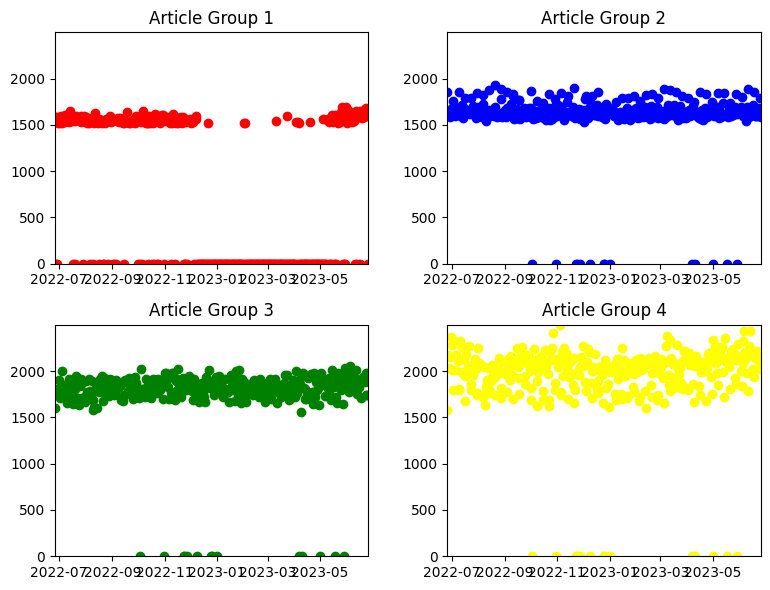

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot scatter plots for each group
axs[0, 0].scatter(df.loc[df['Group'] == '4', 'Date'], df.loc[df['Group'] == '4', 'sales'], color='red', marker='o')
axs[0, 0].set_title('Article Group 1')

axs[0, 1].scatter(df.loc[df['Group'] == '7', 'Date'], df.loc[df['Group'] == '7', 'sales'], color='blue', marker='o')
axs[0, 1].set_title('Article Group 2')

axs[1, 0].scatter(df.loc[df['Group'] == '1', 'Date'], df.loc[df['Group'] == '1', 'sales'], color='green', marker='o')
axs[1, 0].set_title('Article Group 3')

axs[1, 1].scatter(df.loc[df['Group'] == '6', 'Date'], df.loc[df['Group'] == '6', 'sales'], color='yellow', marker='o')
axs[1, 1].set_title('Article Group 4')

# Adjust spacing between subplots
plt.tight_layout()

for ax in axs.flat:
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['sales'].min(), df['sales'].max())

In [1]:
## Imports
import pickle
import warnings
#import streamlit as st
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

import torch
from torch.distributions import Normal
from pytorch_forecasting import (
    TimeSeriesDataSet,
    TemporalFusionTransformer,
)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: dlopen(/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libpng16.16.dylib
  Referenced from: <5F6B6919-410D-397C-98F2-12C5934F9DBE> /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torchvision/image.so
  Reason: tried: '/Users/malfet/miniforge3/envs/py_39_torch-1.10.2/lib/libpng16.16.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/malfet/miniforge3/envs/py_39_torch-1.10.2/lib/libpng16.16.dylib' (no such file), '/Users/ma

In [2]:
def raw_preds_to_df(raw,quantiles = None):
    """
    raw is output of model.predict with return_index=True
    quantiles can be provided like [0.1,0.5,0.9] to get interpretable quantiles
    in the output, time_idx is the first prediction time index (one step after knowledge cutoff)
    pred_idx the index of the predicted date i.e. time_idx + h - 1
    """
    index = raw[2]
    preds = raw[0].prediction
    dec_len = preds.shape[1]
    n_quantiles = preds.shape[-1]
    preds_df = pd.DataFrame(index.values.repeat(dec_len * n_quantiles, axis=0),columns=index.columns)
    preds_df = preds_df.assign(h=np.tile(np.repeat(np.arange(1,1+dec_len),n_quantiles),len(preds_df)//(dec_len*n_quantiles)))
    preds_df = preds_df.assign(q=np.tile(np.arange(n_quantiles),len(preds_df)//n_quantiles))
    preds_df = preds_df.assign(pred=preds.flatten().numpy())
    if quantiles is not None:
        preds_df['q'] = preds_df['q'].map({i:q for i,q in enumerate(quantiles)})

    preds_df['pred_idx'] = preds_df['time_idx'] + preds_df['h'] - 1
    return preds_df

In [3]:
def prepare_dataset(parameters, df, rain = "Default", temperature = 0.0, datepicker = datetime.date(2022, 10, 24), mapping = {
    "Yes" : 1,
    "No" : 0
}):
    if rain != "Default":
        df["MTXWTH_Day_precip"] = rain_mapping[rain]
    
    df["MTXWTH_Temp_min"] = df["MTXWTH_Temp_min"] + temperature
    df["MTXWTH_Temp_max"] = df["MTXWTH_Temp_max"] + temperature

    lowerbound = datepicker - datetime.timedelta(days = 35) 
    upperbound = datepicker + datetime.timedelta(days = 30) 

    df = df.loc[(df["Date"].dt.date>lowerbound) & (df["Date"].dt.date<=upperbound)]
    print(df)
    df = TimeSeriesDataSet.from_parameters(parameters, df)
    return df.to_dataloader(train=False, batch_size=256,num_workers = 0)

In [4]:
with open('data/parameters.pkl', 'rb') as f:
    parameters = pickle.load(f)
df = pd.read_pickle('data/test_data.pkl')
df = df.loc[(df["Branch"] == "15") & (df["Group"].isin(["6","7","4","1"]))]
_dataloader = prepare_dataset(parameters, df.copy())

            sales  DayInYear  time_idx Wahl Baustelle MontagLangesWE  \
270386  1920.2408        263      2455  0.0       0.0            0.0   
270387  1814.0908        264      2456  0.0       0.0            0.0   
270388  1749.4744        265      2457  0.0       0.0            0.0   
270389  1878.0510        266      2458  0.0       0.0            0.0   
270390  1853.9646        267      2459  0.0       0.0            0.0   
...           ...        ...       ...  ...       ...            ...   
286850  1693.3114        323      2515  0.0       0.0            0.0   
286851  1898.4318        324      2516  0.0       0.0            0.0   
286852  1581.6030        325      2517  0.0       0.0            0.0   
286853  1569.0580        326      2518  0.0       0.0            0.0   
286854     0.0000        327      2519  nan       nan            nan   

       FreitagLangesWE nosale                    holiday AufSommerzeit  ...  \
270386             0.0      0                       none

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
_model = TemporalFusionTransformer.load_from_checkpoint('model/tft_check.ckpt', map_location=torch.device('cpu'))
out = _model.predict(_dataloader, mode="raw", return_x=True, return_index=True)
preds = raw_preds_to_df(out, quantiles = None)

#preds = preds[["pred_idx", "Group", "pred"]]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  rank_zero_warn(


In [6]:
preds

time_idx Group Branch   h  q         pred pred_idx
0       2490     1     15   1  0  1826.949707     2490
1       2490     1     15   2  0  1856.215088     2491
2       2490     1     15   3  0  1871.929688     2492
3       2490     1     15   4  0  1866.095825     2493
4       2490     1     15   5  0  1787.610840     2494
..       ...   ...    ...  .. ..          ...      ...
115     2490     7     15  26  0  1655.261475     2515
116     2490     7     15  27  0  1794.728027     2516
117     2490     7     15  28  0  1600.507812     2517
118     2490     7     15  29  0  1595.128540     2518
119     2490     7     15  30  0  1557.557007     2519

[120 rows x 7 columns]

In [8]:
df[["time_idx","sales", "Group"]]

time_idx      sales Group
270300      2369  1600.9030     1
270301      2370  1811.1958     1
270302      2371  1784.2916     1
270303      2372  1757.3488     1
270304      2373  1741.0982     1
...          ...        ...   ...
287065      2730  1643.1700     7
287066      2731  1597.3518     7
287067      2732  1683.6228     7
287068      2733  1785.2180     7
287069      2734  1589.9020     7

[1464 rows x 3 columns]

In [16]:
new = pd.merge(df, preds, left_on=["time_idx", "Group"], right_on=["pred_idx", "Group"], how = "left")
print(new[new["pred"].isna()])

          sales  DayInYear time_idx Wahl Baustelle MontagLangesWE  \
0     1600.9030        177     2369  0.0       0.0            0.0   
1     1811.1958        178     2370  0.0       0.0            0.0   
2     1784.2916        179     2371  0.0       0.0            0.0   
3     1757.3488        180     2372  0.0       0.0            0.0   
4     1741.0982        181     2373  0.0       0.0            0.0   
...         ...        ...      ...  ...       ...            ...   
1459  1643.1700        173     2730  0.0       0.0            0.0   
1460  1597.3518        174     2731  0.0       0.0            0.0   
1461  1683.6228        175     2732  0.0       0.0            0.0   
1462  1785.2180        176     2733  0.0       0.0            0.0   
1463  1589.9020        177     2734  0.0       0.0            0.0   

     FreitagLangesWE nosale holiday AufSommerzeit  ...       Date  \
0                0.0      0    none           0.0  ... 2022-06-26   
1                0.0      0    no

In [12]:
datepicker = datetime.date(2022, 10, 24)
def add_dates(group):
    #group["date_imputed"] = [datepicker + datetime.timedelta(days=x) for x in range(30)]
    print(group)
    return group

preds["date_imputed"] = preds.groupby("Group").pred.transform(add_dates)

0     1826.949707
1     1856.215088
2     1871.929688
3     1866.095825
4     1787.610840
5     1659.851440
6     1749.331543
7     1878.842407
8     1868.011841
9     1886.265625
10    1882.206055
11    1794.047852
12    1664.293335
13    1855.808838
14    1866.882690
15    1880.703613
16    1893.997437
17    1886.795654
18    1808.130371
19    1699.440552
20    1854.313721
21    1858.726685
22    1814.451782
23    1863.013184
24    1884.281982
25    1781.215820
26    1679.599243
27    1804.118652
28    1800.697144
29    1794.221802
Name: 1, dtype: float32
30    1528.776611
31    1543.648682
32    1544.217407
33    1533.632935
34    1547.297485
35    1568.251465
36    1432.989502
37    1559.411621
38    1555.778076
39    1562.257935
40    1563.604248
41    1542.455200
42    1595.332031
43    1542.713867
44    1494.202271
45    1556.931152
46    1561.306152
47    1575.157959
48    1546.359741
49    1665.563232
50    1547.409302
51    1537.488281
52    1533.096191
53    1506.796509
54  